In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from lmfit import Model, Parameter, report_fit

In [2]:
file_path_emitter = 'emitter_N20.csv'
file_path_emitter_WM = 'emitter_without_matching.csv'
file_path_emitter_10p8 = 'emitter_10p8MHz.csv'
file_path_thicker = 'thicker.csv'
file_path_thinner = 'thinner.csv'
file_path_most_hole = 'most_hole.csv'
file_path_middle_hole = 'middle_hole.csv'
file_path_few_hole = 'few_hole.csv'
file_path_RFID_emitter = 'RFID_emitter.csv'

In [3]:
def get_data(csv_file_name):
    
    file_path = csv_file_name
    data = pd.read_csv(file_path)
    
    data['cm'] = pd.to_numeric(data['cm'], errors='coerce')
    data['mV'] = pd.to_numeric(data['mV'], errors='coerce')
    data['mV.1'] = pd.to_numeric(data['mV.1'], errors='coerce')
    data['mV.2'] = pd.to_numeric(data['mV.2'], errors='coerce')
    data['mV.3'] = pd.to_numeric(data['mV.3'], errors='coerce')
    data['mV.4'] = pd.to_numeric(data['mV.4'], errors='coerce')
    data['mV.5'] = pd.to_numeric(data['mV.5'], errors='coerce')
    data['mV.6'] = pd.to_numeric(data['mV.6'], errors='coerce')
    data['mV.7'] = pd.to_numeric(data['mV.7'], errors='coerce')
    data['mV.8'] = pd.to_numeric(data['mV.8'], errors='coerce')
    data['mV.9'] = pd.to_numeric(data['mV.9'], errors='coerce')
    
    return data['cm'], data['mV'], data['mV.1'], data['mV.2'], data['mV.3'], data['mV.4'], data['mV.5'], data['mV.6'], data['mV.7'], data['mV.8'], data['mV.9']

In [4]:
def data_numpy(data):

    # Preallocate a 2D array (10 rows,  columns)
    num_arrays = 10 # 10 data_set
    array_length = len(data[0]) # len(get_data(file_path_emitter)[1])
    all_arrays = np.zeros((num_arrays, array_length))
    # print(all_arrays)


    for i in range(0,num_arrays):
    #     print(i)
       all_arrays[i, :] = np.asarray(data[i+1])
    #     print(all_arrays[i, :])

    mean = all_arrays.mean(axis=0)
    std = all_arrays.std(axis=0)
    
    return mean, std

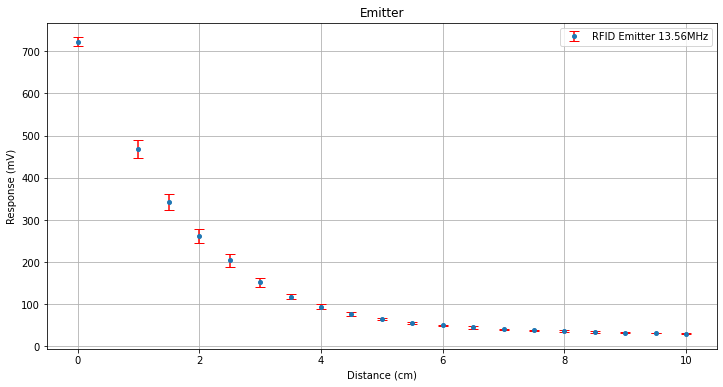

In [5]:
# Create plot
plt.figure(figsize=(12, 6))
plt.errorbar(get_data(file_path_RFID_emitter)[0], data_numpy(get_data(file_path_RFID_emitter))[0], yerr=data_numpy(get_data(file_path_RFID_emitter))[1], fmt=' ', ecolor='red', capsize=5, capthick=1, marker='o', markersize=4, label='RFID Emitter 13.56MHz')


# Adding labels and title
plt.title('Emitter')
plt.xlabel('Distance (cm)')
plt.ylabel('Response (mV)')
plt.legend()

plt.grid(True)

# Save the plot
plt.savefig('RFID_emitter.png')

# Show plot
plt.show()

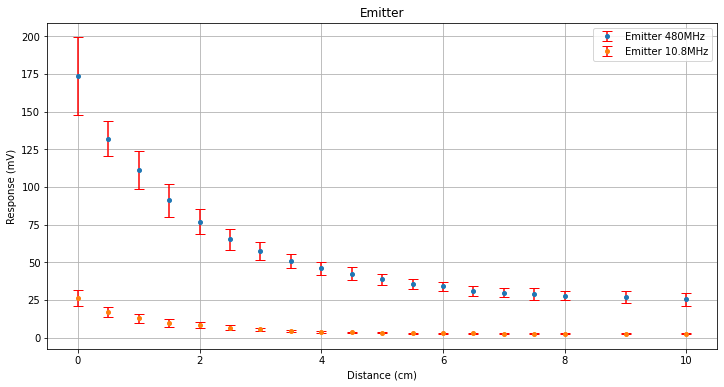

In [6]:
# Create plot
plt.figure(figsize=(12, 6))
plt.errorbar(get_data(file_path_emitter)[0][0:19], data_numpy(get_data(file_path_emitter))[0][0:19], yerr=data_numpy(get_data(file_path_emitter))[1][0:19], fmt=' ', ecolor='red', capsize=5, capthick=1, marker='o', markersize=4, label='Emitter 480MHz')
plt.errorbar(get_data(file_path_emitter_10p8)[0], data_numpy(get_data(file_path_emitter_10p8))[0], yerr=data_numpy(get_data(file_path_emitter_10p8))[1], fmt=' ', ecolor='red', capsize=5, capthick=1, marker='o', markersize=4, label='Emitter 10.8MHz')


# Adding labels and title
plt.title('Emitter')
plt.xlabel('Distance (cm)')
plt.ylabel('Response (mV)')
plt.legend()

plt.grid(True)
# Show plot
plt.show()

In [7]:
def fit_function(r,A,B,eps):
    return (A / (r+eps)**2)+B

[[Model]]
    Model(fit_function)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 355
    # data points      = 20
    # variables        = 3
    chi-square         = 136.839163
    reduced chi-square = 8.04936254
    Akaike info crit   = 44.4614794
    Bayesian info crit = 47.4486762
    R-squared          = 0.94895862
[[Variables]]
    A:    3164.36971 +/- 431.595702 (13.64%) (init = 1000)
    B:    6.84283236 +/- 3.24150478 (47.37%) (init = 1000)
    eps:  2.08219984 +/- 0.15138534 (7.27%) (init = 10)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, eps) = +0.9652
    C(A, B)   = -0.9475
    C(B, eps) = -0.8931


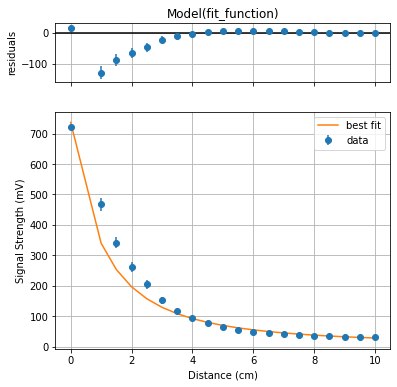

In [8]:
#13.56MHz RFID data fit
model = Model(fit_function, independent_vars=['r'])

result = model.fit(data_numpy(get_data(file_path_RFID_emitter))[0] ,r=get_data(file_path_RFID_emitter)[0],weights=1/data_numpy(get_data(file_path_RFID_emitter))[1],A=1000,B=1000,eps=10)

# Print fit report
print(result.fit_report())

# Plot the result using lmfit's built-in function and retrieve the figure
fig = result.plot()

# Access axes from the figure
ax0 = fig.get_axes()[0]
ax = fig.get_axes()[1]  # This gets the first (and often the only) axes object from the figure

# Set labels with units

ax.set_xlabel('Distance (cm)')
ax.set_ylabel('Signal Strength (mV)')


# Add a grid
ax0.grid(True)
ax.grid(True)

# Show the plot
plt.show()


# print(result.fit_report())
# p = result.plot()

[[Model]]
    Model(fit_function)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 61
    # data points      = 19
    # variables        = 3
    chi-square         = 8.51668135
    reduced chi-square = 0.53229258
    Akaike info crit   = -9.24583231
    Bayesian info crit = -6.41251537
    R-squared          = 0.96886601
[[Variables]]
    A:    48.4546968 +/- 8.25345007 (17.03%) (init = 1)
    B:    2.06291088 +/- 0.11230873 (5.44%) (init = 1)
    eps:  1.33575663 +/- 0.16462978 (12.32%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, B)   = -0.9063
    C(A, eps) = +0.8993
    C(B, eps) = -0.7499


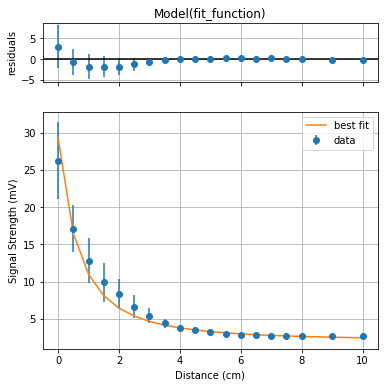

In [9]:
#10.8MHz data fit
model = Model(fit_function, independent_vars=['r'])

result = model.fit(data_numpy(get_data(file_path_emitter_10p8))[0] ,r=get_data(file_path_emitter_10p8)[0],weights=1/data_numpy(get_data(file_path_emitter_10p8))[1],A=1,B=1,eps=1)
# print(result.fit_report())
# p = result.plot()

# Print fit report
print(result.fit_report())

# Plot the result using lmfit's built-in function and retrieve the figure
fig = result.plot()

# Access axes from the figure
ax0 = fig.get_axes()[0]
ax = fig.get_axes()[1]  # This gets the first (and often the only) axes object from the figure

# Set labels with units

ax.set_xlabel('Distance (cm)')
ax.set_ylabel('Signal Strength (mV)')


# Add a grid
ax0.grid(True)
ax.grid(True)

# Save the plot
plt.savefig('fit_plot_10p8MHz.png')

# Show the plot
plt.show()

[[Model]]
    Model(fit_function)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 23
    # variables        = 3
    chi-square         = 0.91018963
    reduced chi-square = 0.04550948
    Akaike info crit   = -68.2807203
    Bayesian info crit = -64.8742377
    R-squared          = 0.99898080
[[Variables]]
    A:    1670.72131 +/- 62.4798113 (3.74%) (init = 1000)
    B:    14.3246736 +/- 0.36618190 (2.56%) (init = 100)
    eps:  3.22847030 +/- 0.08132679 (2.52%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, eps) = +0.9558
    C(A, B)   = -0.8140
    C(B, eps) = -0.6893


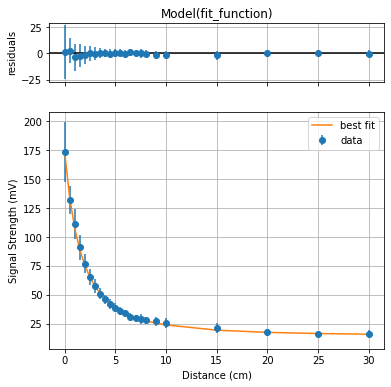

In [10]:
# 480MHz data fit
model = Model(fit_function, independent_vars=['r'])

result = model.fit(data_numpy(get_data(file_path_emitter))[0] ,r=get_data(file_path_emitter)[0],weights=1/data_numpy(get_data(file_path_emitter))[1],A=1000,B=100,eps=1)
# print(result.fit_report())
# p = result.plot()

# Print fit report
print(result.fit_report())

# Plot the result using lmfit's built-in function and retrieve the figure
fig = result.plot()

# Access axes from the figure
ax0 = fig.get_axes()[0]
ax = fig.get_axes()[1]  # This gets the first (and often the only) axes object from the figure

# Set labels with units

ax.set_xlabel('Distance (cm)')
ax.set_ylabel('Signal Strength (mV)')


# Add a grid
ax0.grid(True)
ax.grid(True)

# Save the plot
plt.savefig('fit_plot_480MHz.png')

# Show the plot
plt.show()

In [11]:
# model = Model(fit_function, independent_vars=['r'])

# result = model.fit(data_numpy(get_data(file_path_emitter))[0] ,r=get_data(file_path_emitter)[0],weights=1/data_numpy(get_data(file_path_emitter))[1],A=0.01,n=1,B=10)
# print(result.fit_report())
# p = result.plot()

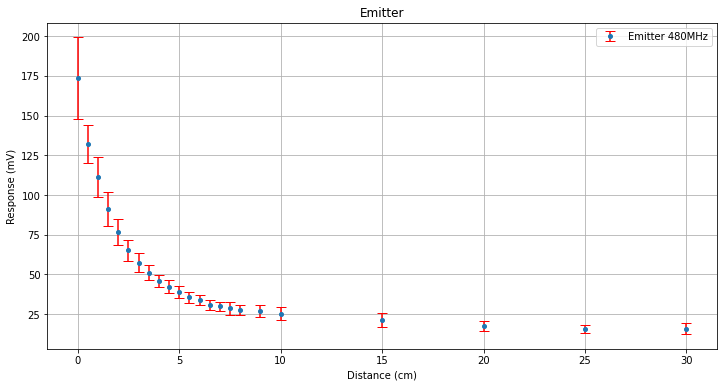

In [12]:
# Create plot
plt.figure(figsize=(12, 6))
plt.errorbar(get_data(file_path_emitter)[0], data_numpy(get_data(file_path_emitter))[0], yerr=data_numpy(get_data(file_path_emitter))[1], fmt=' ', ecolor='red', capsize=5, capthick=1, marker='o', markersize=4, label='Emitter 480MHz')
# plt.errorbar(get_data(file_path_emitter_WM)[0], data_numpy(get_data(file_path_emitter_WM))[0], yerr=data_numpy(get_data(file_path_emitter_WM))[1], fmt=' ', ecolor='red', capsize=5, capthick=1, marker='o', markersize=4, label='Emitter 480MHz without impedance matching')


# Adding labels and title
plt.title('Emitter')
plt.xlabel('Distance (cm)')
plt.ylabel('Response (mV)')
plt.legend()

plt.grid(True)
# Show plot
plt.show()

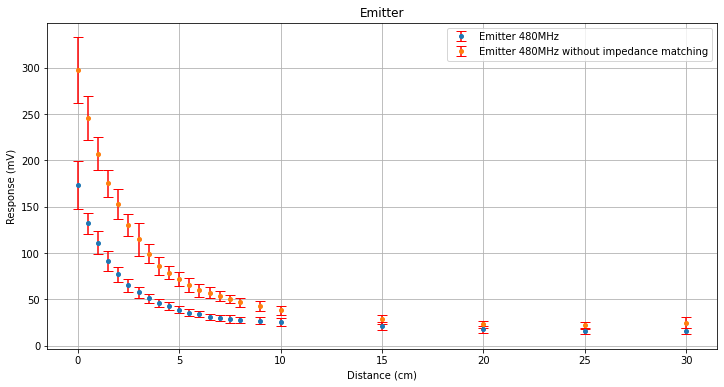

In [13]:
# Create plot
plt.figure(figsize=(12, 6))
plt.errorbar(get_data(file_path_emitter)[0], data_numpy(get_data(file_path_emitter))[0], yerr=data_numpy(get_data(file_path_emitter))[1], fmt=' ', ecolor='red', capsize=5, capthick=1, marker='o', markersize=4, label='Emitter 480MHz')
plt.errorbar(get_data(file_path_emitter_WM)[0], data_numpy(get_data(file_path_emitter_WM))[0], yerr=data_numpy(get_data(file_path_emitter_WM))[1], fmt=' ', ecolor='red', capsize=5, capthick=1, marker='o', markersize=4, label='Emitter 480MHz without impedance matching')


# Adding labels and title
plt.title('Emitter')
plt.xlabel('Distance (cm)')
plt.ylabel('Response (mV)')
plt.legend()

plt.grid(True)
# Show plot
plt.show()

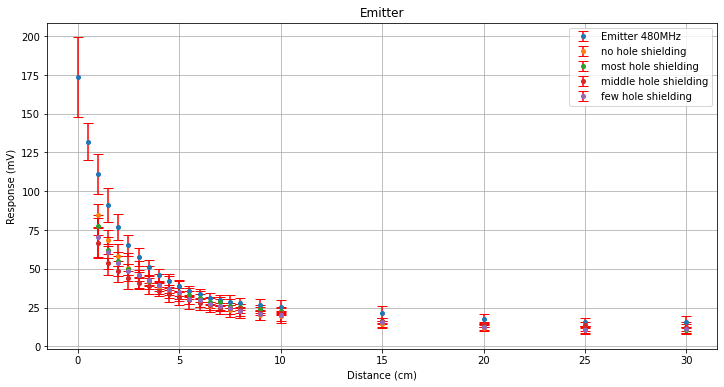

In [14]:
# Create plot
plt.figure(figsize=(12, 6))
plt.errorbar(get_data(file_path_emitter)[0], data_numpy(get_data(file_path_emitter))[0], yerr=data_numpy(get_data(file_path_emitter))[1], fmt=' ', ecolor='red', capsize=5, capthick=1, marker='o', markersize=4, label='Emitter 480MHz')
plt.errorbar(get_data(file_path_thinner)[0], data_numpy(get_data(file_path_thinner))[0], yerr=data_numpy(get_data(file_path_thinner))[1], fmt=' ', ecolor='red', capsize=5, capthick=1, marker='o', markersize=4, label='no hole shielding')
plt.errorbar(get_data(file_path_most_hole)[0], data_numpy(get_data(file_path_most_hole))[0], yerr=data_numpy(get_data(file_path_most_hole))[1], fmt=' ', ecolor='red', capsize=5, capthick=1, marker='o', markersize=4, label='most hole shielding')
plt.errorbar(get_data(file_path_middle_hole)[0], data_numpy(get_data(file_path_middle_hole))[0], yerr=data_numpy(get_data(file_path_middle_hole))[1], fmt=' ', ecolor='red', capsize=5, capthick=1, marker='o', markersize=4, label='middle hole shielding')
plt.errorbar(get_data(file_path_few_hole)[0], data_numpy(get_data(file_path_few_hole))[0], yerr=data_numpy(get_data(file_path_few_hole))[1], fmt=' ', ecolor='red', capsize=5, capthick=1, marker='o', markersize=4, label='few hole shielding')

# Adding labels and title
plt.title('Emitter')
plt.xlabel('Distance (cm)')
plt.ylabel('Response (mV)')
plt.legend()

# plt.xscale('log')
# plt.yscale('log')

plt.grid(True)
# Show plot
plt.show()

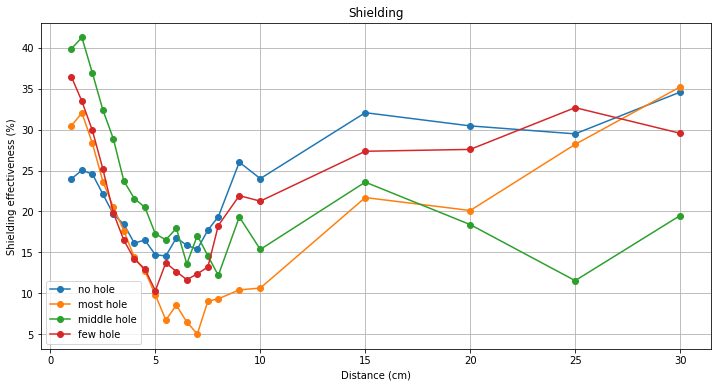

In [15]:
# plot out the % of unshielding

plt.figure(figsize=(12, 6))


plt.plot(get_data(file_path_thinner)[0],100-data_numpy(get_data(file_path_thinner))[0]*100/data_numpy(get_data(file_path_emitter))[0],label='no hole',marker='o')
plt.plot(get_data(file_path_most_hole)[0],100-data_numpy(get_data(file_path_most_hole))[0]*100/data_numpy(get_data(file_path_emitter))[0],label='most hole',marker='o')
plt.plot(get_data(file_path_middle_hole)[0],100-data_numpy(get_data(file_path_middle_hole))[0]*100/data_numpy(get_data(file_path_emitter))[0],label='middle hole',marker='o')
plt.plot(get_data(file_path_few_hole)[0],100-data_numpy(get_data(file_path_few_hole))[0]*100/data_numpy(get_data(file_path_emitter))[0],label='few hole',marker='o')

# Adding labels and title
plt.title('Shielding')
plt.xlabel('Distance (cm)')
plt.ylabel('Shielding effectiveness (%)')
plt.legend()

plt.grid(True)
# Show plot
plt.show()


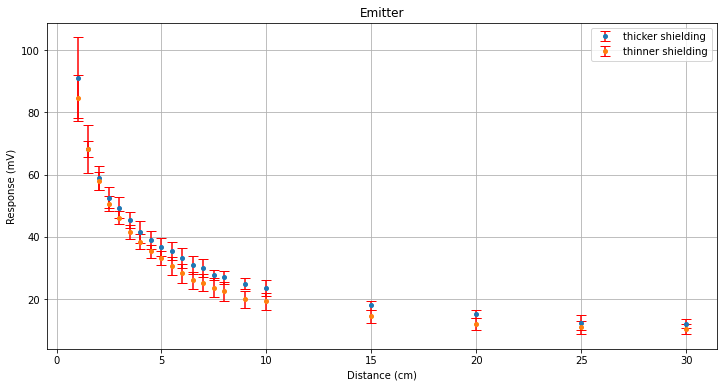

In [16]:
# Create plot
plt.figure(figsize=(12, 6))
# plt.errorbar(get_data(file_path_emitter)[0], data_numpy(get_data(file_path_emitter))[0], yerr=data_numpy(get_data(file_path_emitter))[1], fmt=' ', ecolor='red', capsize=5, capthick=1, marker='o', markersize=4, label='Emitter 480MHz')
plt.errorbar(get_data(file_path_thicker)[0], data_numpy(get_data(file_path_thicker))[0], yerr=data_numpy(get_data(file_path_thicker))[1], fmt=' ', ecolor='red', capsize=5, capthick=1, marker='o', markersize=4, label='thicker shielding')
plt.errorbar(get_data(file_path_thinner)[0], data_numpy(get_data(file_path_thinner))[0], yerr=data_numpy(get_data(file_path_thinner))[1], fmt=' ', ecolor='red', capsize=5, capthick=1, marker='o', markersize=4, label='thinner shielding')


# Adding labels and title
plt.title('Emitter')
plt.xlabel('Distance (cm)')
plt.ylabel('Response (mV)')
plt.legend()

plt.grid(True)
# Show plot
plt.show()

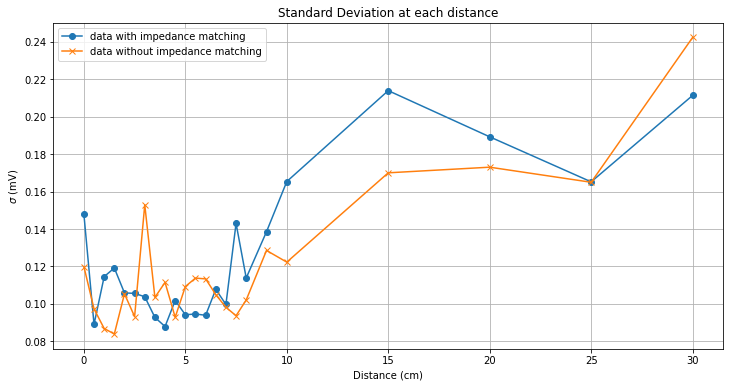

In [17]:
# Plotting
plt.figure(figsize=(12, 6))


plt.plot(get_data(file_path_emitter)[0],data_numpy(get_data(file_path_emitter))[1]/data_numpy(get_data(file_path_emitter))[0],label='data with impedance matching',marker='o')
plt.plot(get_data(file_path_emitter_WM)[0],data_numpy(get_data(file_path_emitter_WM))[1]/data_numpy(get_data(file_path_emitter_WM))[0],label='data without impedance matching',marker='x')


plt.title('Standard Deviation at each distance')
plt.xlabel('Distance (cm)')
plt.ylabel('$\sigma$ (mV)')
plt.grid(True)

# plt.xscale('log')
# plt.yscale('log')

# plt.xlim(0.5,1)

plt.legend()
plt.show()

In [25]:
print(np.__version__)
import matplotlib
print(matplotlib.__version__)
print(pd.__version__)
import lmfit
print(lmfit.__version__)

1.22.4
3.4.1
1.4.0
1.3.0
